# Howto

To run this notebook you should already:
- cloned project https://huggingface.co/spaces/aletrn/lisa-on-cuda with active git lfs
- created and activated a virtualenv
- installed jupyterlab dependencies from requirements_jupyter.txt
- installed dependencies from requirements.txt

## Hardware requirements
- an nvidia gpu with 10 or 12GB of memory (a T4 should suffice)
- at least 16GB of system ram

In [1]:
%cd ~/workspace/lisa-on-cuda
!pip list
# !python -m pytest --cov=utils --cov-report=term-missing && coverage html
# print("ok")

/home/jovyan/workspace/lisa-on-cuda


/home/jovyan/workspace/lisa-on-cuda/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/workspace/lisa-on-cuda/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Package                   Version
------------------------- ---------------
accelerate                0.27.2
aiofiles                  23.2.1
aiosignal                 1.3.1
altair                    5.2.0
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bitsandbytes              0.42.0
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.2.0
coverage                  7.4.3
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
distro         

In [2]:
import logging
# from torch.cuda import empty_cache

logging.basicConfig(level=logging.INFO, force = True)

# logging.info("try to empty cuda mem cache...")
# empty_cache()
# del inference_fn
# logging.info("emptied cuda mem cache!")
print("ok")

ok


In [3]:
from utils import utils

_vars = utils.create_placeholder_variables()
print("_vars:", _vars["no_seg_out"].shape)
print("_vars:", _vars.keys())
print("ok")

INFO:root:placeholders_folder:/home/jovyan/workspace/lisa-on-cuda/resources/placeholders.


_vars: (512, 512, 3)
_vars: dict_keys(['no_seg_out', 'error_happened'])
ok


In [4]:
from utils import app_helpers, constants, utils
import matplotlib.pyplot as plt
import cv2
print("ok")

INFO:httpx:HTTP Request: GET https://api.gradio.app/gradio-messaging/en "HTTP/1.1 200 OK"
INFO:root:placeholders_folder:/home/jovyan/workspace/lisa-on-cuda/resources/placeholders.


ok


img


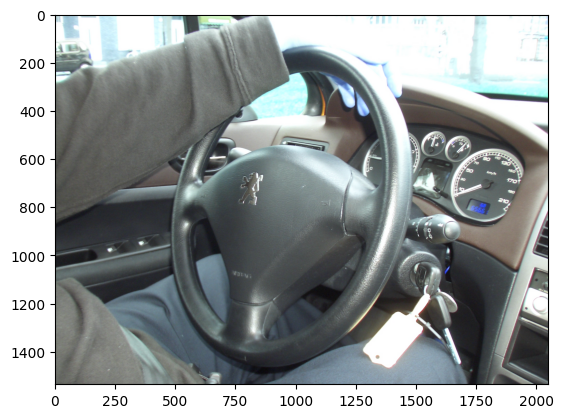

In [5]:
es1 = cv2.imread(constants.examples[0][1])

plt.imshow(es1)
print("img")

In [6]:
from datetime import datetime

print(f"start the creation of the inference function, now is {datetime.now()}.")
test_args_parse = app_helpers.parse_args([])
inference_fn = app_helpers.get_inference_model_by_args(test_args_parse)
print("created inference_fn!")

INFO:root:args_to_parse:Namespace(version='xinlai/LISA-13B-llama2-v1-explanatory', vis_save_path='./vis_output', precision='fp16', image_size=1024, model_max_length=512, lora_r=8, vision_tower='openai/clip-vit-large-patch14', local_rank=0, load_in_8bit=False, load_in_4bit=True, use_mm_start_end=True, conv_type='llava_v1'), creating model...
INFO:root:starting model preparation...


start the creation of the inference function, now is 2024-03-08 00:46:21.807791.


You are using the legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

INFO:root:model preparation ok!
INFO:root:created model, preparing inference function
INFO:root:prepared inference function!


created inference_fn!


INFO:root:start cleaning of input_str: Where can the driver see the car speed in this image? Please output segmentation mask..
INFO:root:cleaned input_str: Where can the driver see the car speed in this image? Please output segmentation mask..
INFO:root:input_str type: <class 'str'>, input_image type: <class 'str'>.
INFO:root:input_str: Where can the driver see the car speed in this image? Please output segmentation mask., input_image: <class 'str'>.
INFO:root:image_clip type: <class 'torch.Tensor'>.
INFO:root:preprocess started
INFO:root:preprocess ended
INFO:root:image_clip type: <class 'torch.Tensor'>.
/home/jovyan/workspace/lisa-on-cuda/venv/lib/python3.10/site-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/m

start inference using inference_fn, now is 2024-03-08 00:50:27.788806.
input_prompt:Where can the driver see the car speed in this image? Please output segmentation mask..


INFO:root:found n 1 prediction masks, text_output type: <class 'str'>, text_output: Sure, [SEG] .</s>.
INFO:root:output_image type: <class 'numpy.ndarray'>.


output_str: ASSISTANT: Sure, [SEG] .</s> ....
shape mask: (1536, 2048), type: <class 'numpy.ndarray'>, dtype: uint8 #
shape img: (1536, 2048, 3) #
ok


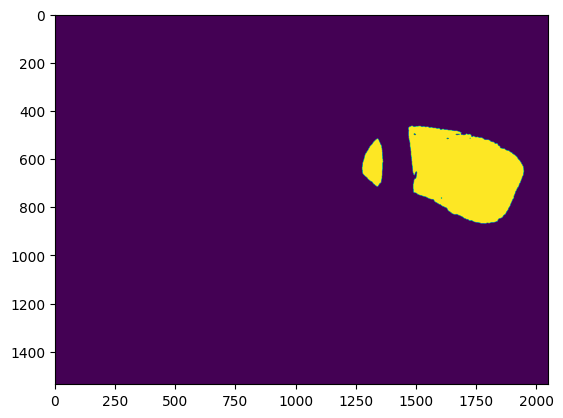

In [7]:
from datetime import datetime

print(f"start inference using inference_fn, now is {datetime.now()}.")
idx_example = 0
input_prompt, input_image_path = constants.examples[idx_example]
# input_prompt = "Assuming you are an autonomous driving robot, what part of the diagram would you manipulate to control the direction of travel? Please output segmentation mask and explain why."
print(f"input_prompt:{input_prompt}.")
output_image, output_mask, output_str = inference_fn(
    input_prompt,
    str(utils.ROOT / input_image_path)
)
print(f"output_str: {output_str}.")
print(f"shape mask: {output_mask.shape}, type: {type(output_mask)}, dtype: {output_mask.dtype} #")
print(f"shape img: {output_image.shape} #")
plt.imshow(output_mask)
print("ok")

ok


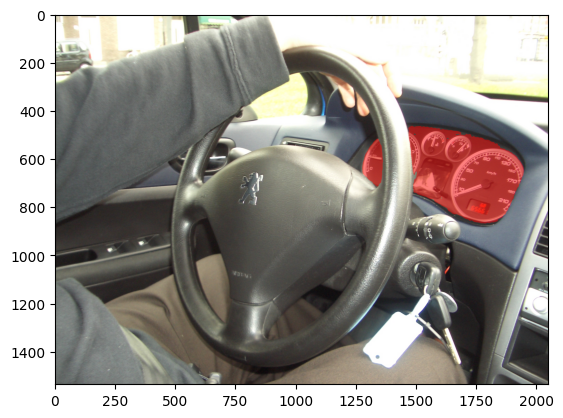

In [8]:

plt.imshow(output_image)
print("ok")

img check type:<class 'numpy.ndarray'>, (1536, 2048). uint8.


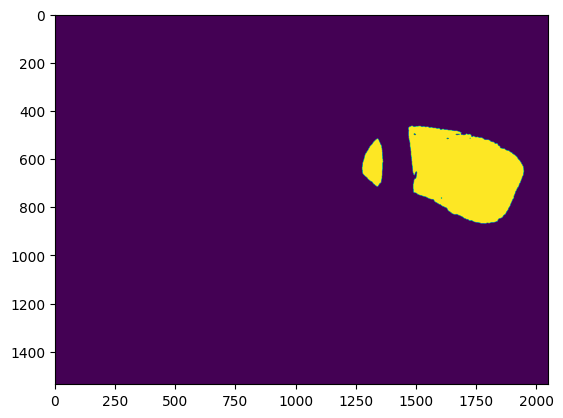

In [12]:
from PIL import Image
from utils import utils

"""
# current_example_path = str(utils.ROOT / "tests" / "imgs" / f"example{idx_example+1}_mask_0.png")
current_example_path = str(utils.ROOT / "tests" / "imgs" / f"example1c_mask_0.png")

im = Image.fromarray(output_mask)
im.save(current_example_path)
"""

expected_images_path = utils.ROOT / "tests" / "imgs"
example1_path = str(expected_images_path / f"example{idx_example+1}_mask_0.png")
mod_path = str(expected_images_path / "mod.png")
expected_mask = cv2.imread(mod_path, cv2.IMREAD_GRAYSCALE)
print(f"img check type:{type(expected_mask)}, {expected_mask.shape}. {expected_mask.dtype}.")
plt.imshow(expected_mask)

In [13]:
import numpy as np

max_diff = 0.02
tot = output_mask.size
count = np.sum(output_mask != expected_mask)
perc = 100 * count / tot

logging.info(f"perc of different pixels between output_mask and expected_mask: {perc:.2f}!")
try:
    assert np.array_equal(output_mask, expected_mask)
except AssertionError:
    try:
        logging.error("failed equality assertion!")
        logging.info(f"assert now that perc diff between ndarrays is minor than {max_diff}.")
        assert perc < max_diff
    except AssertionError as ae:
        logging.error("failed all assertions, writing debug files...")
        import datetime
        now_str = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
        output_folder = utils.ROOT / "tests" / "imgs"
        prefix = f"broken_test_example{idx_example + 1}_{now_str}"
        cv2.imwrite(
            str(output_folder / f"{prefix}.png"),
            output_mask
        )
        with open(output_folder / f"{prefix}__input_prompt.txt",
                  "w") as dst:
            dst.write(input_prompt)
        with open(output_folder / f"{prefix}__output_str.txt",
                  "w") as dst:
            dst.write(output_str)
        logging.info(f"Written files with prefix '{prefix}' in {output_folder} folder.")
        raise ae
logging.info("end")
print("end")


INFO:root:perc of different pixels between output_mask and expected_mask: 0.00!
INFO:root:end


end
